<a href="https://colab.research.google.com/github/pingstech/ZeroToHero-ML/blob/main/09_MachineLearning_DecisionTreeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
 
from pydrive.drive import GoogleDrive
 
from google.colab import auth
 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
 
gauth = GoogleAuth()
 
gauth.credentials = GoogleCredentials.get_application_default()
 
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import files
 
file_id = "17EugnZNndyG-GgR2qyhll_a4U7cYctO_"
 
downloaded = drive.CreateFile({'id': file_id})
 
downloaded.GetContentFile("decision_tree_regression_dataset.csv")

In [ ]:
#CART: Classification and Regression Tree
#Information entropy'e göre verimizi ayırıyoruz(split ediyoruz)
#Information entropy'e göre ayırdığımız her kısma "Terminal Leaf" diyoruz
#Her "Leaf"deki değerlerin ortalaması alınıp yazılır.

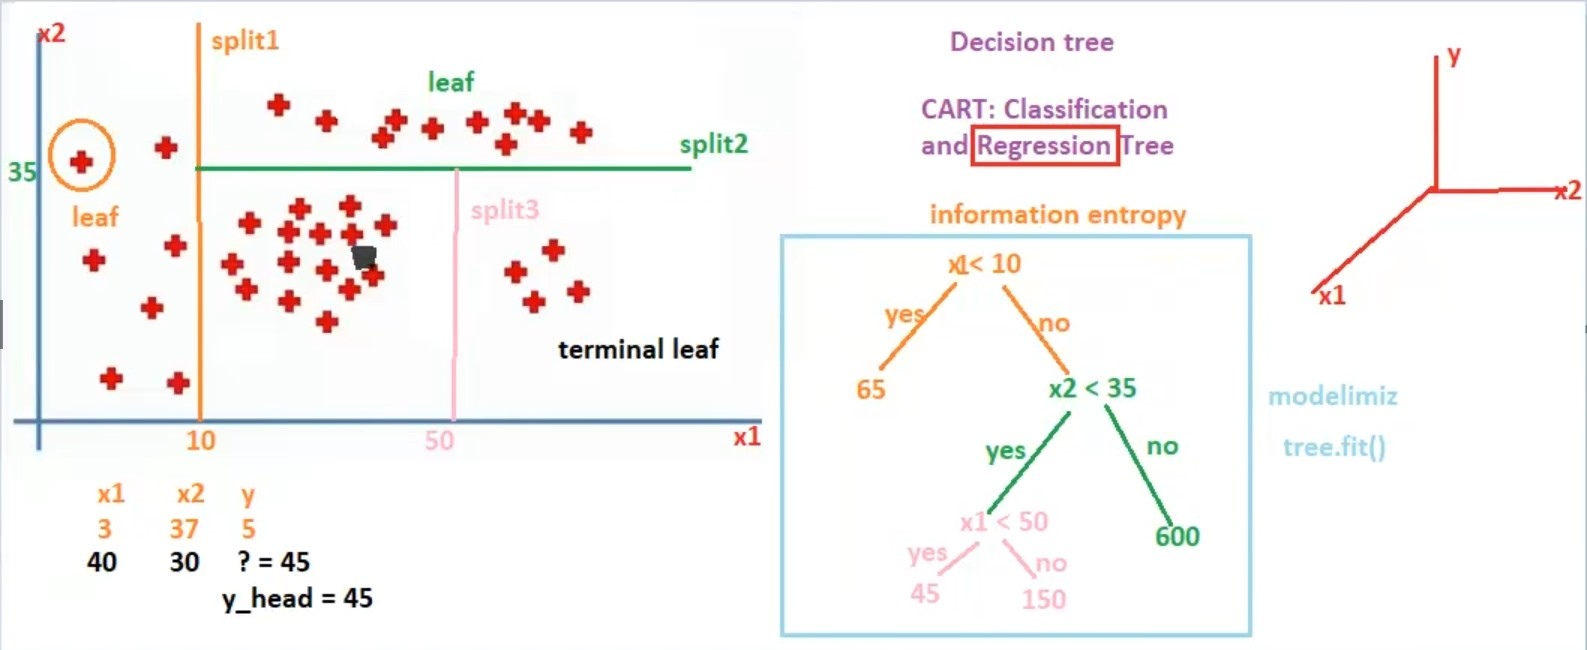

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("decision_tree_regression_dataset.csv",sep=";",header=None) # "1" ve "100" index değil bu yüzden "header=None" yazdık
df

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


In [ ]:
x=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values.reshape(-1,1)
print("---------- X VALUES ----------")
print(x)
print("---------- Y VALUES ----------")
print(y)

---------- X VALUES ----------
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
---------- Y VALUES ----------
[[100]
 [ 80]
 [ 70]
 [ 60]
 [ 50]
 [ 40]
 [ 30]
 [ 20]
 [ 10]
 [  5]]


In [ ]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x,y)
y_head=tree_reg.predict(x)

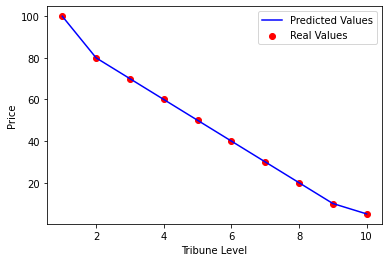

In [ ]:
#Görselleştirme
plt.scatter(x,y,color="red",label="Real Values")
plt.plot(x,y_head,color="blue",label="Predicted Values")
plt.legend()
plt.xlabel("Tribune Level")
plt.ylabel("Price")
plt.show()

In [ ]:
#Yukarıda oluşturduğumuz grafikte istediğimiz değerlere göre tahmin(predict) yaptırdık.
#Yapmamaız gereken aslında büyük bir aralıkta tahmin yaptırmak.
#Bu yüzden yeni bir array oluşturacağız
newX=np.arange(min(x),max(x),0.01).reshape(-1,1) # burada x'in ilk min değerinden, maks değerine kadar 0.01 artacak şekilde yeni bir array oluşturuyoruz
newY_head=tree_reg.predict(newX)

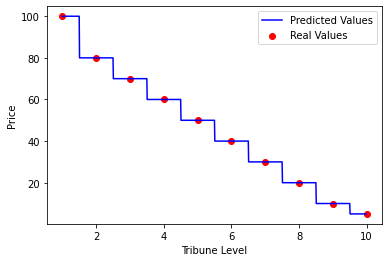

In [ ]:
plt.scatter(x,y,color="red",label="Real Values")
plt.plot(newX,newY_head,color="blue",label="Predicted Values")
plt.legend()
plt.xlabel("Tribune Level")
plt.ylabel("Price")
plt.show()